# Decision Trees Exercise
In this exercise you will show that ID3 is sub-optimal. Implement a simple version of Decision Tree, and will then apply a Decision Tree classsifier on the MNIST hand written digits dataset that we already saw.


## Suboptimality of ID3
Consider the following training set, where $\mathcal{X} = \{0, 1\}^3$ and $\mathcal{Y} =\{0, 1\}$:

$$
\begin{aligned}
((1, 1, 1), 1)\\
((1, 0, 0), 1)\\
((1, 1, 0), 0)\\
((0, 0, 1), 0)
\end{aligned}
$$

Suppose we wish to use this training set in order to build a decision tree of depth 2 (i.e. for each
input we are allowed to ask two questions of the form "$x_i = 0$?" before deciding on the label).

1. Suppose we run the ID3 algorithm up to depth 2 (namely, we pick the root node and its
children according to the algorithm, but instead of keeping on with the recursion, we stop
and pick leaves according to the majority label in each subtree, once we reach depth 2). 
Assume that the subroutine used to measure the quality of each feature is based on the information gain, and that if two features get the same score, one of them is picked arbitrarily. 
Show that the training error of the resulting decision tree is at least 1/4.
2. Find a decision tree of depth 2, which attains zero training error.


#### Answer
Put your answer here...

## Implementing Decision Tree From Scratch
In this exercise you will need to implement a simple version of Decision Tree from scratch. Your decision tree will handle **continuous input and output** (this should actually work also for binary input attributes).

* Compelete the skeleton class below
  - `X` is a matrix of data values (rows are samples, columns are attributes)
  - `y` is a vector of corresponding target values
  - `min_leaf` is the minimal number of samples in each leaf node
  
* For splitting criterion, use either **"Train Squared Error Minimization (Reduction in Variance)"** or **"Train Absolute Error Minimization"** (choose one). Whatever you choose, make sure you implement the splitting point decision efficiently (in $O(nlgn)$ time).

* The `predict` function will use mean of the target values in the leaf node matching each row of the given `X`. The result is a vector of predictions matching the number of rows in `X`.

* To check your decision tree implementation, use the boston dataset (`from sklearn.datasets import load_boston`) split the data set into train and test using (`from sklearn.model_selection import train_test_split`)

  - Use the following to estimate what are the best hyper parameters to use for your model
```
    for min_leaf in [1,5,10,100]:
      dt = DecisionTree(X, y, n, sz, min_leaf)
      mse = # mean square error over test set
      print("min_leaf:{0} --- oob mse: {1}".format(min_leaf, mse))
```
  
  - Using your chosen hyperparameters as a final model, plot the predictions vs. true values of all the samples in the training set . Use something like:
  ```
  y_hat = dt.predict(X_train)  # forest is the chosen model
  plt.scatter(y_hat, y_test)
  ```

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [ ]:
from sklearn import datasets
boston_dataset = datasets.load_boston()

In [ ]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
class DecisionTree():
  def __init__(self, X, y, n_trees, sample_sz, min_leaf):
    pass

  def predict(self, X):
    pass



In [ ]:
def mse(v):
    return np.mean(np.square(v - np.mean(v)))


def reduction_variance(parent, left_child, right_child):
    ''' function get variance reduction '''
    weight_l = len(left_child) / len(parent)
    weight_r = len(right_child) / len(parent)
    reduction = np.var(parent) - (weight_l * np.var(left_child) + weight_r * np.var(right_child))
    return reduction


def get_thresholds
"""find the best featurte"""
    for feature in ranges(num_features):
        feature_index,  score, split= find_best_split(feature)


def find_best_split(feature_index):
    # select feature column
    x = X.values[index, feature_index]

    # for each feature in row
    for sample in range(samples):
        # separate the data by each feature
        left = x <= x[sample]
        right = x > x[sample]
        # find  weighted averge score 
        score = reduction_variance(y, left, right)
        # keep lowest score
        if score < score:
            feature_index = feature_index
            score = score
            # keep feature and observation where score is at the  minimum
            split = x[sample]
    return feature_index,  score, split
                      
                
def predict_node( x):
    # start with root node
    if is_terminal: 
        return value
    # decide if going left or right
    # continue until  last node
    # return value
    if x[feature_index] <= split 
        node = left
    else 
        node = right
    return node


def predict(node, X):
    n_samples = X.shape[0]
    predictions = np.zeros(n_samples)
    for i in range(0, n_samples):
        predictions[i] = predict_node(node, X[i])
    return predictions



SyntaxError: invalid syntax (<ipython-input-10-a499d81e2ab0>, line 13)

## Using Decision Treefor Digits Classification
Remeber the MNIST dataset used - you will now test the power of decision trees on this problem.
This time you are given a free hand in choosing the test and train set sizes, model parameters (such as gain function and constraints over the trees) and features (whether to use binary pixel values or the original continous gray value).
- Choose which model parameters you wish to optimize, explain how would you do that, and find a model which you believe would have the minimal generalization error --- do this for both a single decision tree model, and a random forest.
  - You can use `sklearn.tree.DecisionTreeClassifier`
- Once you are satisfied with the model parameters, plot the importance of each of the pixels to the final decision.
- Last, estimate the class assignment probabilities for all the correctly classified and misclassified examples in your test data.
- Discuss your results.

## 1 Choose which model parameters

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
X, y = mnist["data"], mnist["target"]

In [ ]:
X.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_test.shape

(14000,)

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'criterion':['gini','entropy'], 'max_leaf_nodes': list(range(2, 20)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

In [9]:
from sklearn.model_selection import GridSearchCV

params = {'criterion':['gini','entropy'], 'max_leaf_nodes': list(range(2, 20)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [10]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=19, random_state=42)

In [11]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.6652142857142858

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1111    0    0   49    3   27   91   40   17    5]
 [   4 1432   16    4    0   10   14   12   76   32]
 [  98   86  815   25   12   18  150  111   32   33]
 [  55   33  169  651   13  168   72   42   48  182]
 [   5    3    3    0  639   27  151   28   30  409]
 [  81   13    1  102   85  567  231   27   57  109]
 [  71   31   21    3   32   28 1098   13   58   41]
 [  45   11   53    3   24    4   58 1187   13  105]
 [   1  105   41   72   28   47  239    2  732   90]
 [   5    3    9   24   24   40  128   43   63 1081]]
              precision    recall  f1-score   support

           0       0.75      0.83      0.79      1343
           1       0.83      0.90      0.86      1600
           2       0.72      0.59      0.65      1380
           3       0.70      0.45      0.55      1433
           4       0.74      0.49      0.59      1295
           5       0.61      0.45      0.51      1273
           6       0.49      0.79      0.61      1396
           7       0.79      0.79   

#### almost random very bad accuracy 

In [13]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier


In [14]:
# bag_clf = BaggingClassifier(
#     DecisionTreeClassifier(max_features="sqrt", max_leaf_nodes=16),
#     n_estimators=500, random_state=42)

In [15]:
# bag_clf.fit(X_train, y_train)
# y_pred = bag_clf.predict(X_test)

In [16]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [18]:
import numpy as np

In [19]:
np.sum(y_pred == y_pred_rf) / len(y_pred)  # very similar predictions

0.6954285714285714

In [ ]:
# # rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
# rnd_clf.fit(mnist["data"], mnist["target"])
# for name, score in zip(mnist["feature_names"], rnd_clf.feature_importances_):
#     print(name, score)

In [ ]:
# rnd_clf.feature_importances_

In [23]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1111    0    0   49    3   27   91   40   17    5]
 [   4 1432   16    4    0   10   14   12   76   32]
 [  98   86  815   25   12   18  150  111   32   33]
 [  55   33  169  651   13  168   72   42   48  182]
 [   5    3    3    0  639   27  151   28   30  409]
 [  81   13    1  102   85  567  231   27   57  109]
 [  71   31   21    3   32   28 1098   13   58   41]
 [  45   11   53    3   24    4   58 1187   13  105]
 [   1  105   41   72   28   47  239    2  732   90]
 [   5    3    9   24   24   40  128   43   63 1081]]
              precision    recall  f1-score   support

           0       0.75      0.83      0.79      1343
           1       0.83      0.90      0.86      1600
           2       0.72      0.59      0.65      1380
           3       0.70      0.45      0.55      1433
           4       0.74      0.49      0.59      1295
           5       0.61      0.45      0.51      1273
           6       0.49      0.79      0.61      1396
           7       0.79      0.79   

## 2 Importance of each of the pixels

In [30]:
import matplotlib as mpl

In [25]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [26]:
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(mnist["data"], mnist["target"])

RandomForestClassifier(random_state=42)

In [27]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.hot,
               interpolation="nearest")
    plt.axis("off")

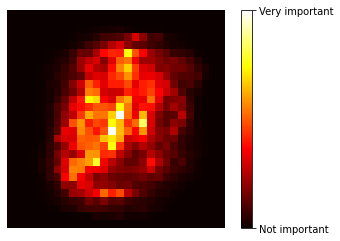

In [31]:
import matplotlib.pyplot as plt 

plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])

plt.show()

## 3 Estimate the class assignment probabilities

In [36]:
# rnd_clf.predict_proba([[5, 1.5]])

In [37]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(rnd_clf, X_train, y_train, cv=3)

In [38]:
conf_m = confusion_matrix(y_train, y_train_pred)
conf_m

array([[5489,    1,    5,    0,    3,    7,   21,    1,   31,    2],
       [   1, 6177,   36,   15,   11,    4,    8,   10,   10,    5],
       [  26,    9, 5416,   28,   25,    3,   20,   40,   33,   10],
       [   7,    9,   75, 5437,    2,   53,    6,   44,   52,   23],
       [   9,    7,    6,    0, 5360,    0,   29,   10,   14,   94],
       [  23,    4,    9,   61,   10, 4824,   48,    8,   32,   21],
       [  26,   12,    5,    0,    8,   26, 5383,    0,   20,    0],
       [   5,   19,   57,    5,   34,    1,    0, 5586,   10,   73],
       [  20,   28,   26,   40,   25,   39,   27,    6, 5195,   62],
       [  24,   10,   16,   79,   67,   17,    3,   42,   35, 5245]])

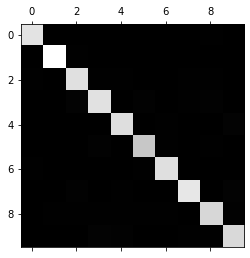

In [39]:
plt.matshow(conf_m, cmap=plt.cm.gray)
plt.show()

In [40]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

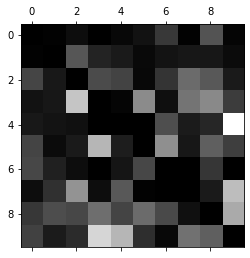

In [41]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [42]:
cl_a, cl_b = 3, 5
